In [31]:
from hnc.hnc.hnc import Integral_Equation_Solver as iet
from hnc.hnc.misc import rs_from_n, n_from_rs
from hnc.hnc.constants import *

import numpy as np

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['xtick.labelsize']=14


In [26]:

Γ, κ = 1, 3
T_AU = 1*eV_to_AU
A = 1

ri = 1/(Γ*T_AU)
ni = n_from_rs(ri)

# HNC package
hnc = iet(1, Γ, 3/(4*π), T_AU, m_p*A, dst_type=3, h_max=1e3, oz_method='standard',
        kappa = κ, kappa_multiscale = 1.0,  R_max=20.0, N_bins=5000, names=None, closure='hnc')

hnc.HNC_solve(num_iterations = 1e5, alpha_Picard=1e-1)

0: Initial condition Total Error: 4.310e+00
Exiting status 0, reverting to best index so far: 146
Final iter:147, Total Error: 9.371e-07


0

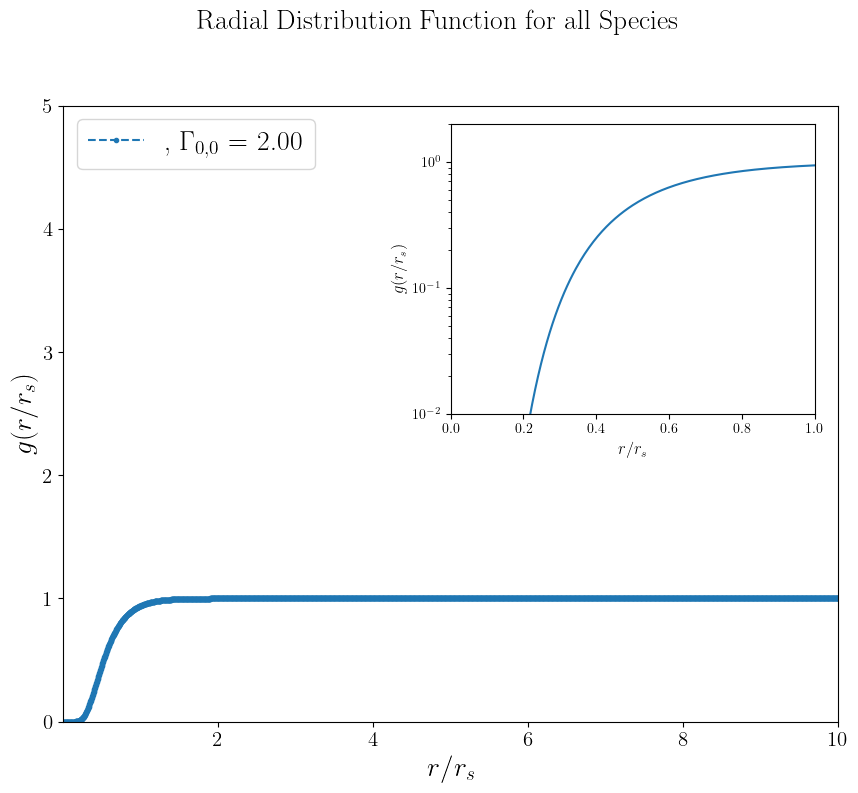

(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>)

In [24]:
hnc.plot_g_all_species()

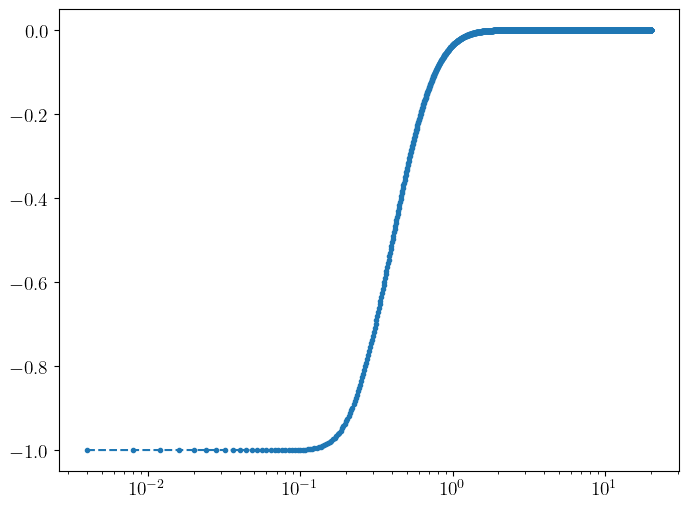

In [35]:
fig, ax  = plt.subplots()

ax.plot(hnc.r_array, hnc.h_r_matrix[0,0],'--.')
ax.set_xscale('log')

In [25]:
np.savetxt(f"gofr_Yukawa_Γ={Γ:0.3f}_κ={κ:0.3f}.txt", np.array([hnc.r_array, hnc.h_r_matrix[0,0]+1]).T, header = "r/rs    g(r/rs)", fmt='%12.3e', comments='')